In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Read data
dataframe = pd.read_csv(r"C:\Users\Hema\Rishikaa\Data Analyst\Customer_Segmentation_K_Means/Mall_Customers.csv")

In [4]:
# Info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# First 5 rows of our data
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataframe.drop(["CustomerID"], axis = 1, inplace=True)

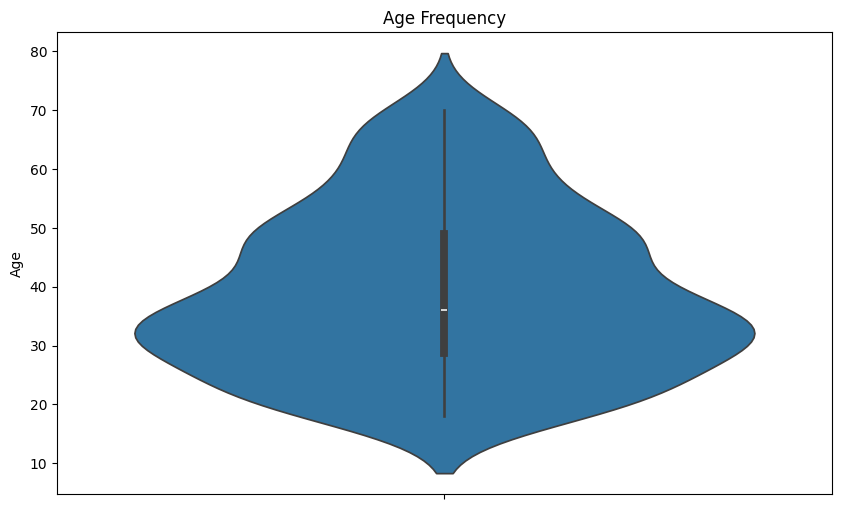

In [8]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=dataframe["Age"])
plt.show()

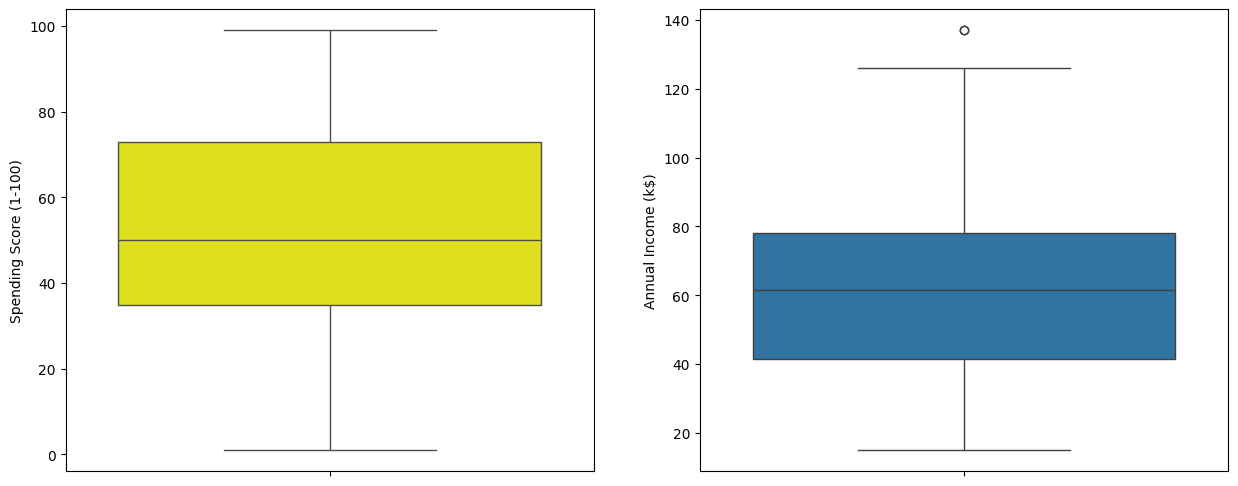

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataframe["Spending Score (1-100)"], color="yellow")
plt.subplot(1,2,2)
sns.boxplot(y=dataframe["Annual Income (k$)"])
plt.show()

C:\Users\Hema\AppData\Local\Temp\ipykernel_17484\2635060782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette='Set2', legend=False)


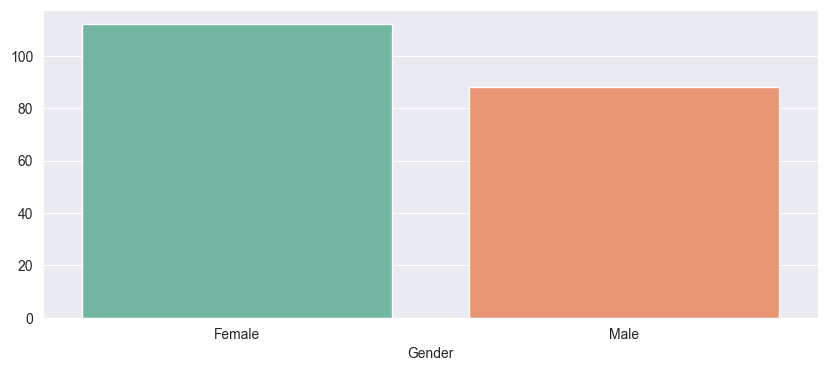

In [10]:
genders = dataframe.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values, palette='Set2', legend=False)
plt.show()

C:\Users\Hema\AppData\Local\Temp\ipykernel_17484\3178583791.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


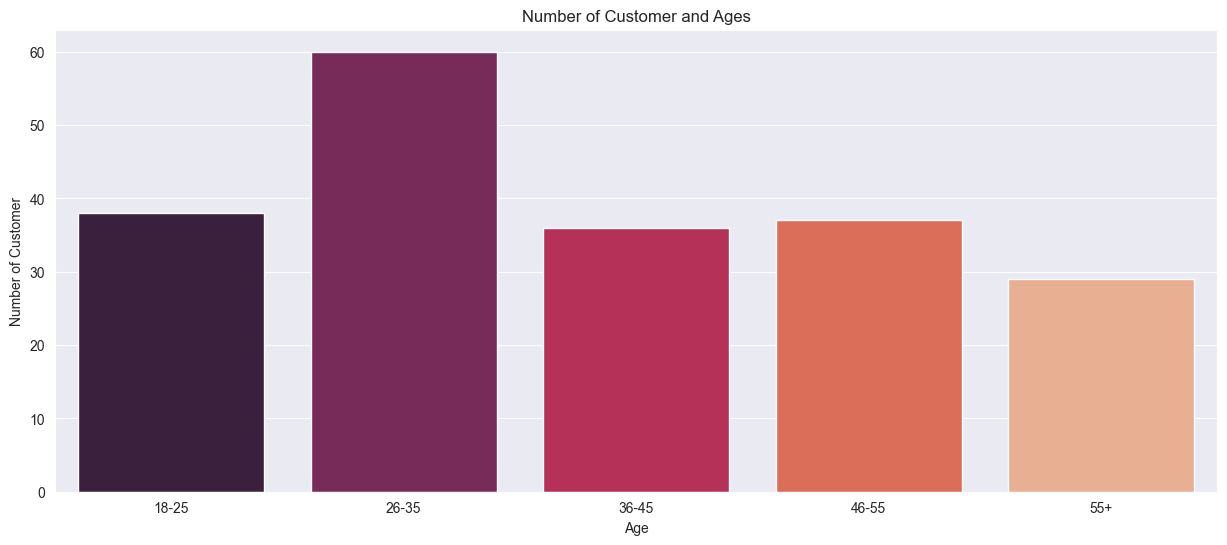

In [11]:
age18_25 = dataframe.Age[(dataframe.Age <= 25) & (dataframe.Age >= 18)]
age26_35 = dataframe.Age[(dataframe.Age <= 35) & (dataframe.Age >= 26)]
age36_45 = dataframe.Age[(dataframe.Age <= 45) & (dataframe.Age >= 36)]
age46_55 = dataframe.Age[(dataframe.Age <= 55) & (dataframe.Age >= 46)]
age55above = dataframe.Age[dataframe.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

C:\Users\Hema\AppData\Local\Temp\ipykernel_17484\246185484.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")


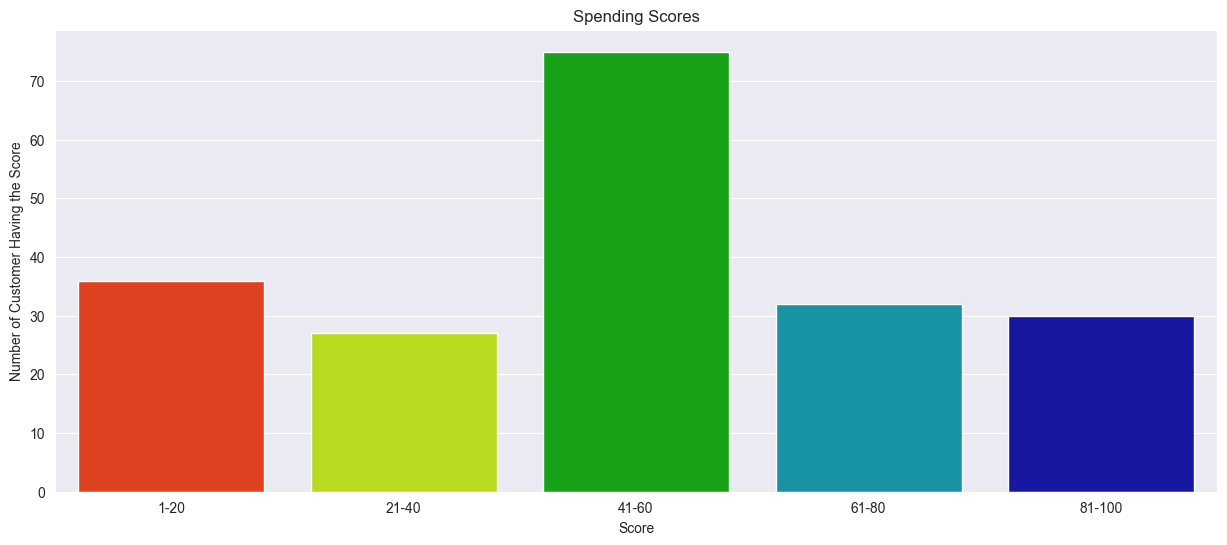

In [12]:
ss1_20 = dataframe["Spending Score (1-100)"][(dataframe["Spending Score (1-100)"] >= 1) & (dataframe["Spending Score (1-100)"] <= 20)]
ss21_40 = dataframe["Spending Score (1-100)"][(dataframe["Spending Score (1-100)"] >= 21) & (dataframe["Spending Score (1-100)"] <= 40)]
ss41_60 = dataframe["Spending Score (1-100)"][(dataframe["Spending Score (1-100)"] >= 41) & (dataframe["Spending Score (1-100)"] <= 60)]
ss61_80 = dataframe["Spending Score (1-100)"][(dataframe["Spending Score (1-100)"] >= 61) & (dataframe["Spending Score (1-100)"] <= 80)]
ss81_100 = dataframe["Spending Score (1-100)"][(dataframe["Spending Score (1-100)"] >= 81) & (dataframe["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

C:\Users\Hema\AppData\Local\Temp\ipykernel_17484\3411520159.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Set2")


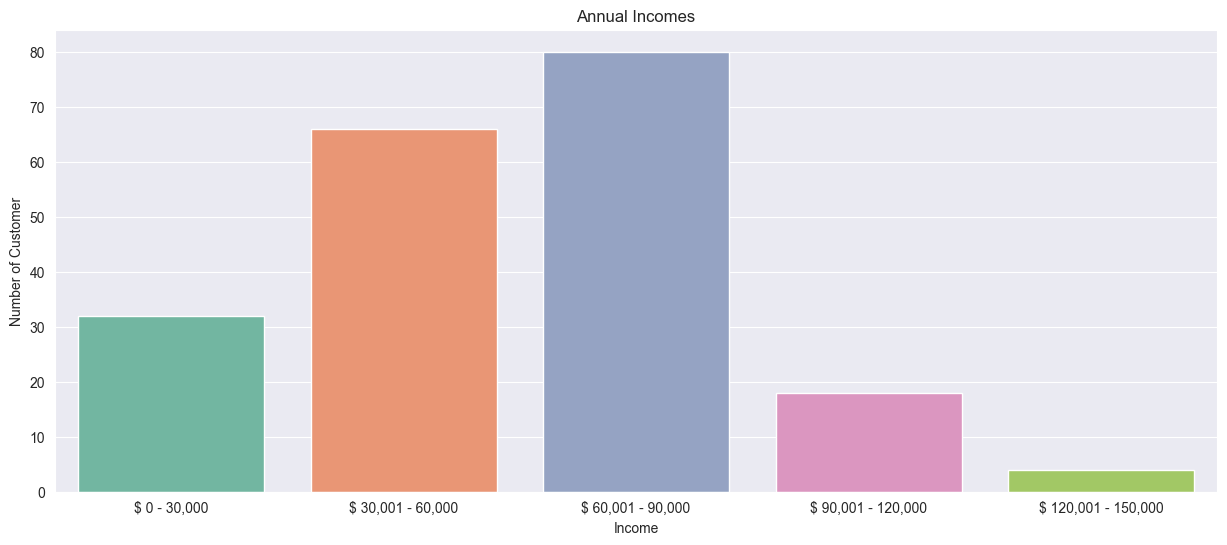

In [13]:
ai0_30 = dataframe["Annual Income (k$)"][(dataframe["Annual Income (k$)"] >= 0) & (dataframe["Annual Income (k$)"] <= 30)]
ai31_60 = dataframe["Annual Income (k$)"][(dataframe["Annual Income (k$)"] >= 31) & (dataframe["Annual Income (k$)"] <= 60)]
ai61_90 = dataframe["Annual Income (k$)"][(dataframe["Annual Income (k$)"] >= 61) & (dataframe["Annual Income (k$)"] <= 90)]
ai91_120 = dataframe["Annual Income (k$)"][(dataframe["Annual Income (k$)"] >= 91) & (dataframe["Annual Income (k$)"] <= 120)]
ai121_150 = dataframe["Annual Income (k$)"][(dataframe["Annual Income (k$)"] >= 121) & (dataframe["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [14]:
#K-Means
#K-means clustering is a type of unsupervised learning which is used when you have unlabeled data. 

In [15]:
#We will use Age, Annual Income and Spending Score for clustering customers. Let's look how our plot is seen without clustering.

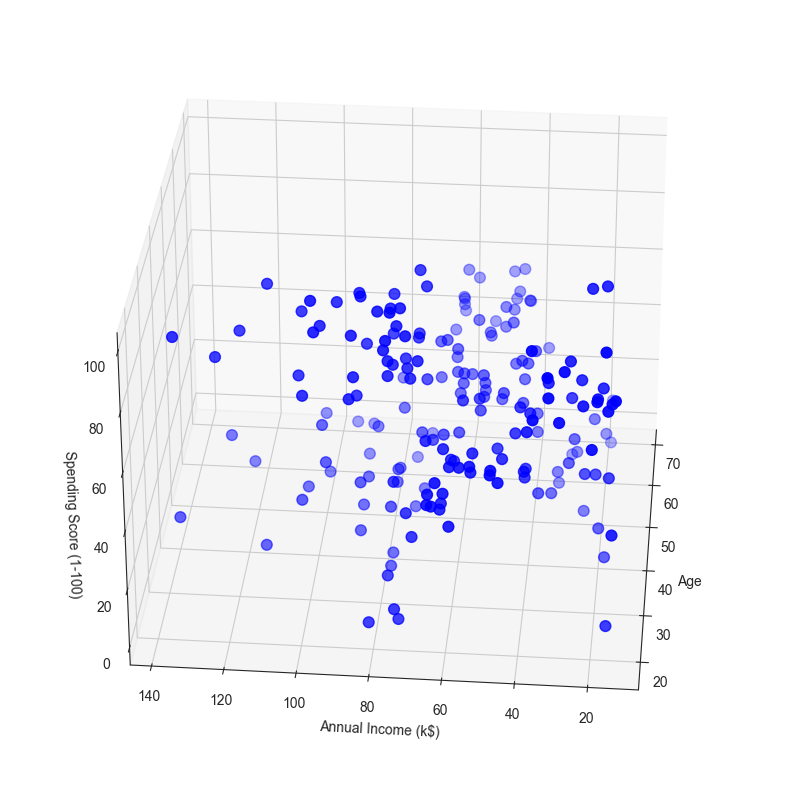

In [16]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe.Age, dataframe["Annual Income (k$)"], dataframe["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [17]:
#Now we will try to find what "k" value we should use. We will find out it with "elbow method".

In [18]:
#Elbow Method 
#The elbow method is a graphical technique for finding the optimal number of clusters, or K value, in a k-means clustering algorithm. 

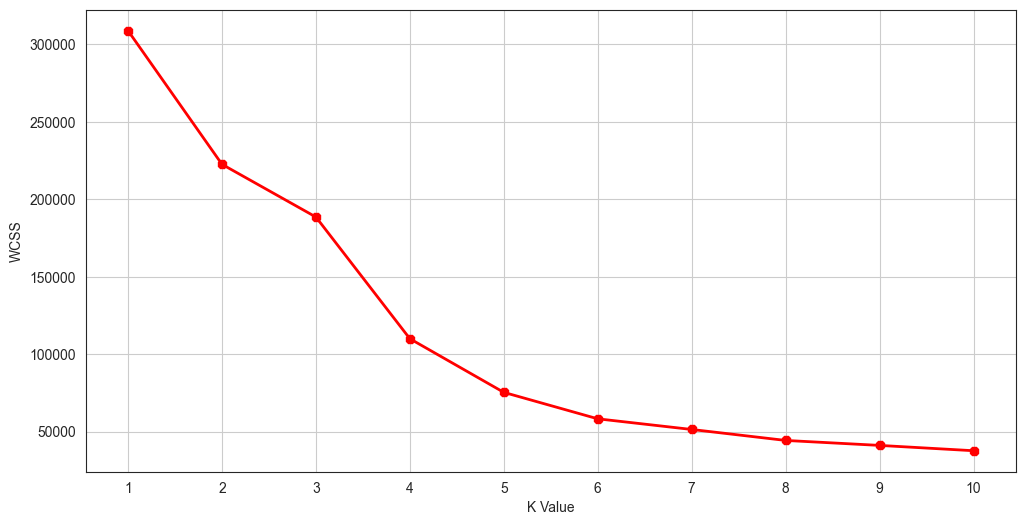

In [19]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dataframe.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [20]:
#When we use elbow method in the above we may say 5 will be our number of cluster. Let's use K-Means and see how our plot will look like.

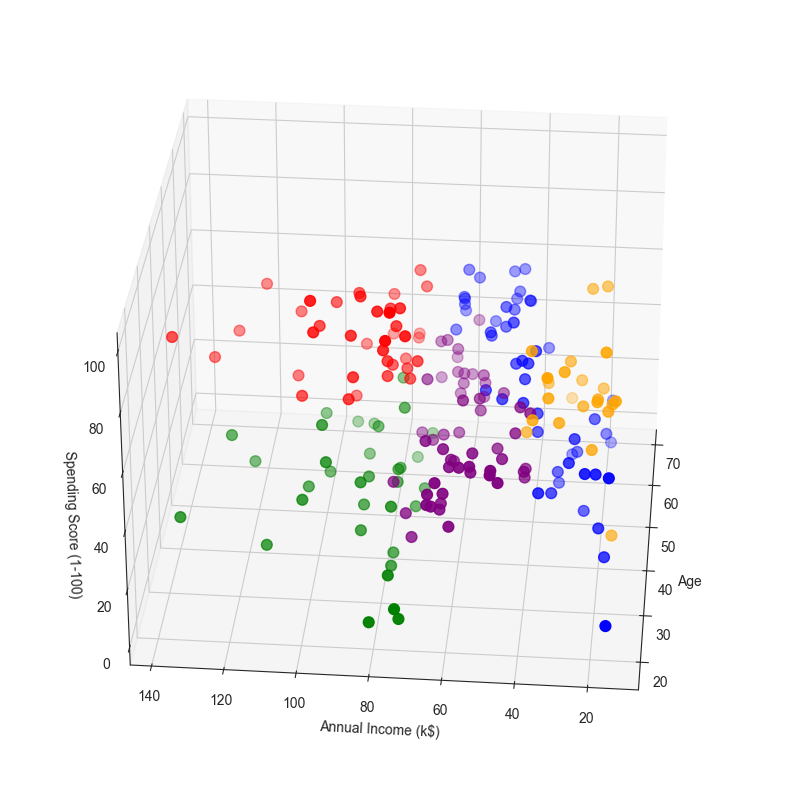

In [21]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(dataframe.iloc[:,1:])

dataframe["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe.Age[dataframe.label == 0], dataframe["Annual Income (k$)"][dataframe.label == 0], dataframe["Spending Score (1-100)"][dataframe.label == 0], c='blue', s=60)
ax.scatter(dataframe.Age[dataframe.label == 1], dataframe["Annual Income (k$)"][dataframe.label == 1], dataframe["Spending Score (1-100)"][dataframe.label == 1], c='red', s=60)
ax.scatter(dataframe.Age[dataframe.label == 2], dataframe["Annual Income (k$)"][dataframe.label == 2], dataframe["Spending Score (1-100)"][dataframe.label == 2], c='green', s=60)
ax.scatter(dataframe.Age[dataframe.label == 3], dataframe["Annual Income (k$)"][dataframe.label == 3], dataframe["Spending Score (1-100)"][dataframe.label == 3], c='orange', s=60)
ax.scatter(dataframe.Age[dataframe.label == 4], dataframe["Annual Income (k$)"][dataframe.label == 4], dataframe["Spending Score (1-100)"][dataframe.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [22]:
#We have 5 type of customer and we grouped them as you can see above.